In [67]:
import matplotlib.pyplot as plot

In [68]:
def getLoss(logFile, epochs = 3):
    f = open(logFile, "r", encoding='utf-8')
    line = f.readline()  # 以行的形式进行读取文件
    global_steps = {f"Train Epoch: {id}":[] for id in range(1, epochs+1)}
    loss = {f"Train Epoch: {id}":[] for id in range(1, epochs+1)}
    image2text_Acc = {f"Train Epoch: {id}":[] for id in range(1, epochs+1)}
    text2Image_Acc = {f"Train Epoch: {id}":[] for id in range(1, epochs+1)}
    lr = {f"Train Epoch: {id}":[] for id in range(1, epochs+1)}
    val_loss = []
    val_image2text_Acc = []
    val_text2Image_Acc = []

    id = 1
    while line:         
        # print(line, type(line))
        epoch_name = ""
        if "Train Epoch" in line:
            line = [part.strip() for part in line.split('|')]
            # print(line)
            epoch_name = line[4][:line[4].index("[")].strip()
            # print(epoch_name)
        elif "Validation Result" in line:
            line = [part.strip() for part in line.split('|')]
            for part in line:
                if "Valid Loss" in part: val_loss.append(float(part.split(":")[1].strip()))
                if "Image2Text Acc" in part: val_image2text_Acc.append(float(part.split(":")[1].strip()))
                if "Text2Image Acc" in part: val_text2Image_Acc.append(float(part.split(":")[1].strip()))
            # print(val_loss)
            # print(val_image2text_Acc)
            # print(val_text2Image_Acc)
            # break
            
            line = f.readline()
            continue
        else:
            line = f.readline()
            continue
        

        # line = [part.strip() for part in line.split('|')]
        # print(line)

        
        for part in line:
            if "Global Steps:" in part: global_steps[epoch_name].append(int(part.split(":")[1].strip().split("/")[0]))
            if "Loss:" in part: loss[epoch_name].append(float(part.split(":")[1].strip()))
            if "Image2Text Acc:" in part: image2text_Acc[epoch_name].append(float(part.split(":")[1].strip()))
            if "Text2Image Acc:" in part: text2Image_Acc[epoch_name].append(float(part.split(":")[1].strip()))
            if "LR:" in part: lr[epoch_name].append(float(part.split(":")[1].strip()))

        # print("global_steps : ", global_steps[epoch_name])
        # print("loss : ", loss[epoch_name])
        # print("image2text_Acc : ", image2text_Acc[epoch_name])
        # print("text2Image_Acc : ", text2Image_Acc[epoch_name])
        # print("lr : ", lr[epoch_name])
        # break

    f.close()
    return global_steps, loss, image2text_Acc, text2Image_Acc, lr, val_loss, val_image2text_Acc, val_text2Image_Acc

In [69]:
def drawLine(arr, xName, yName, title, graduate):
    # 横坐标 采用列表表达式
    x = [x+1 for x in range(len(arr))]
    # 纵坐标
    y = arr
    # 生成折线图：函数polt
    plot.figure(figsize=(30, 6))
    plot.plot(x, y)
    # 设置横坐标说明
    plot.xlabel(xName)
    # 设置纵坐标说明
    plot.ylabel(yName)
    # 添加标题
    plot.title(title)
    # 设置横坐标刻度
    # 设置纵坐标刻度
    # plot.xticks(global_steps_graduate)
    # 设置纵坐标刻度
    plot.yticks(graduate)
    # 显示网格
    plot.grid(True)
    # 显示图表
    plot.show()

len(global_steps):  20


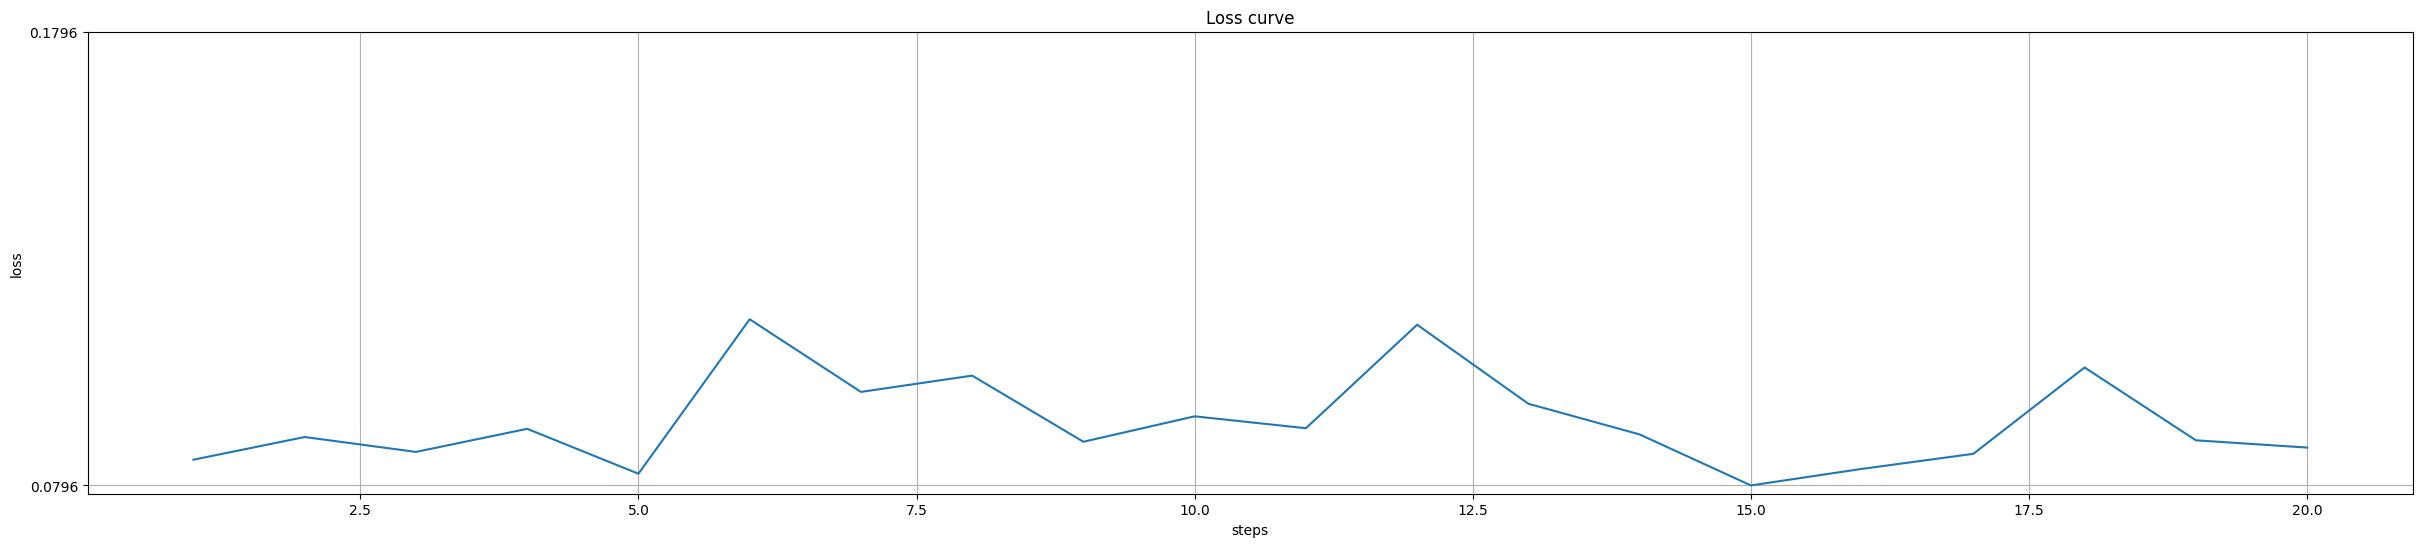

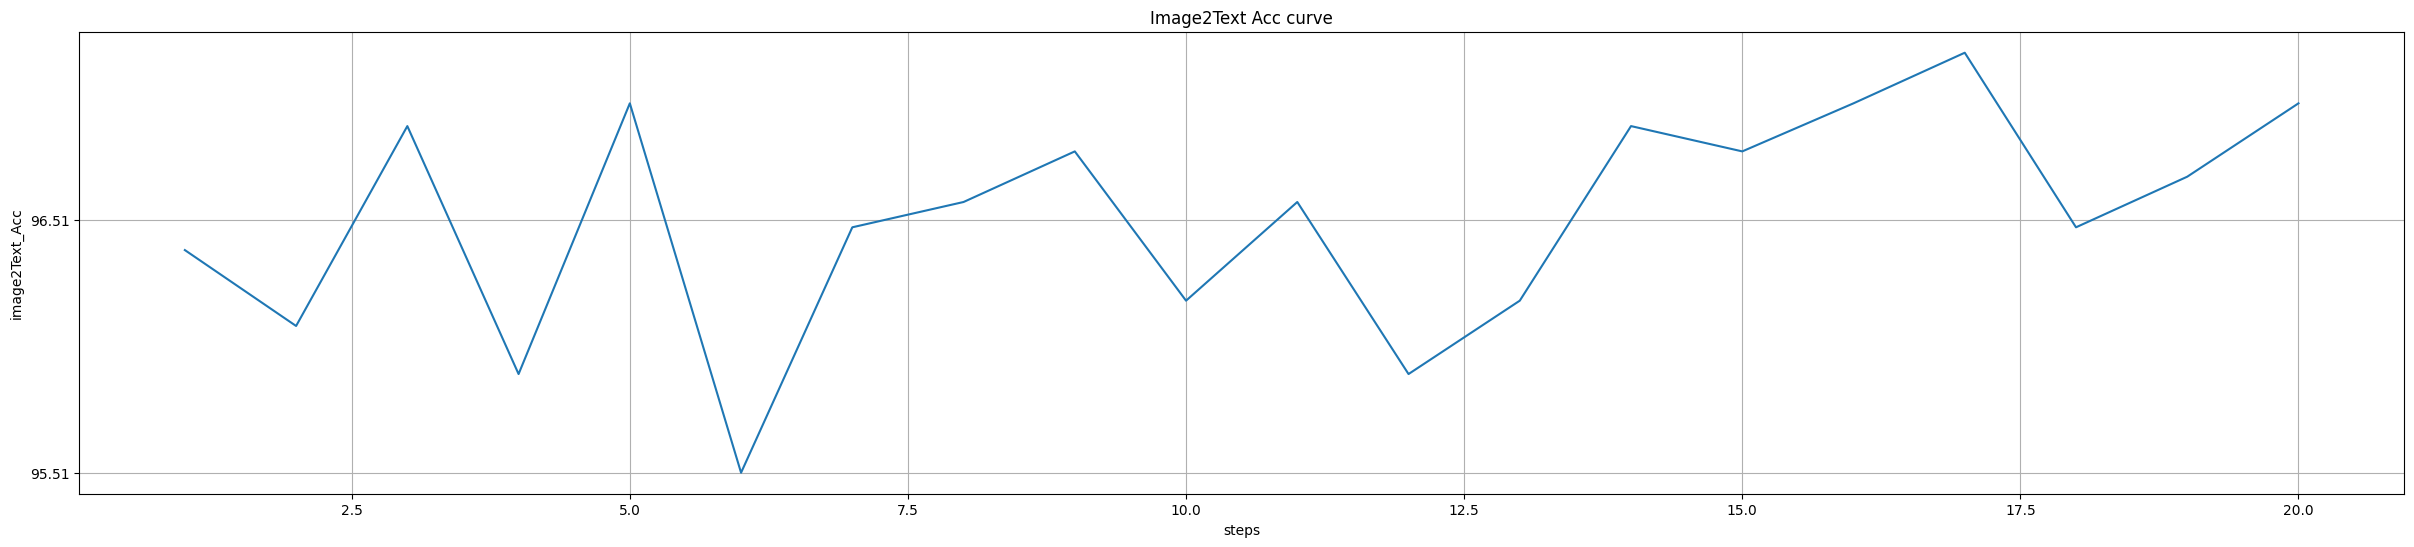

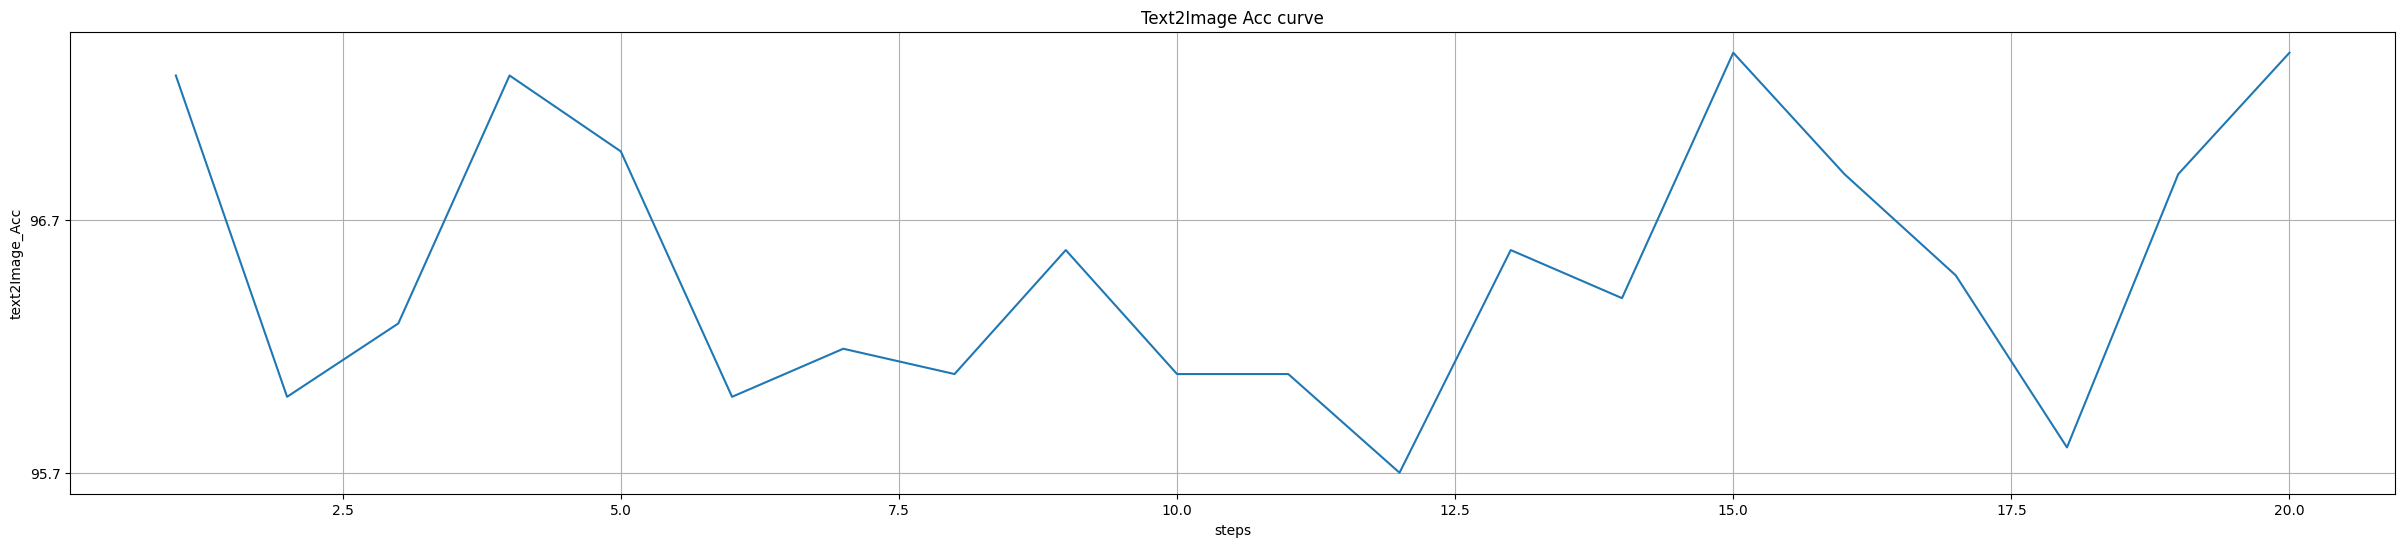

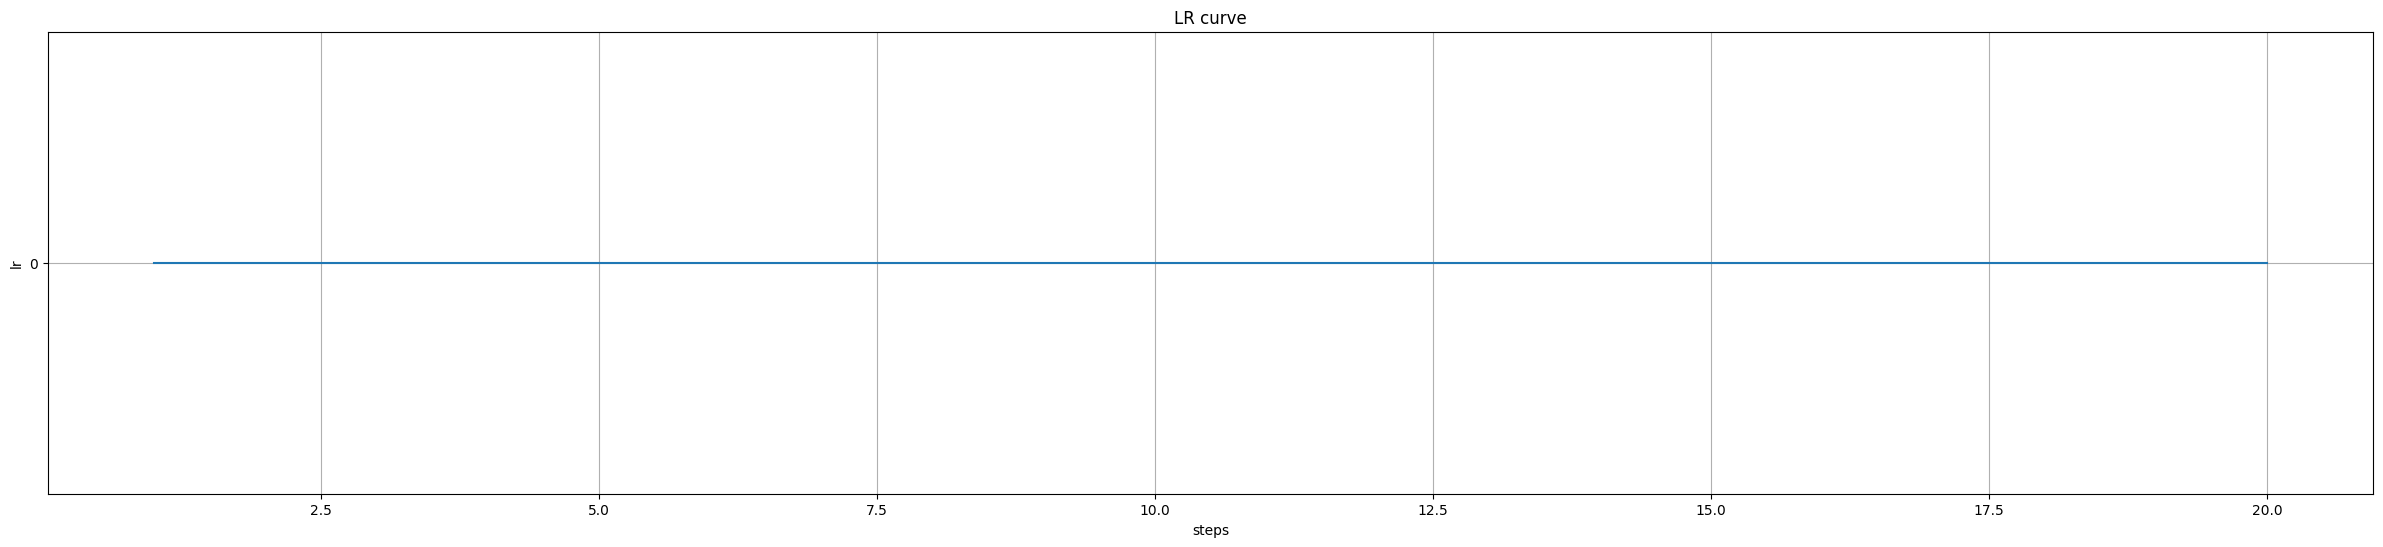

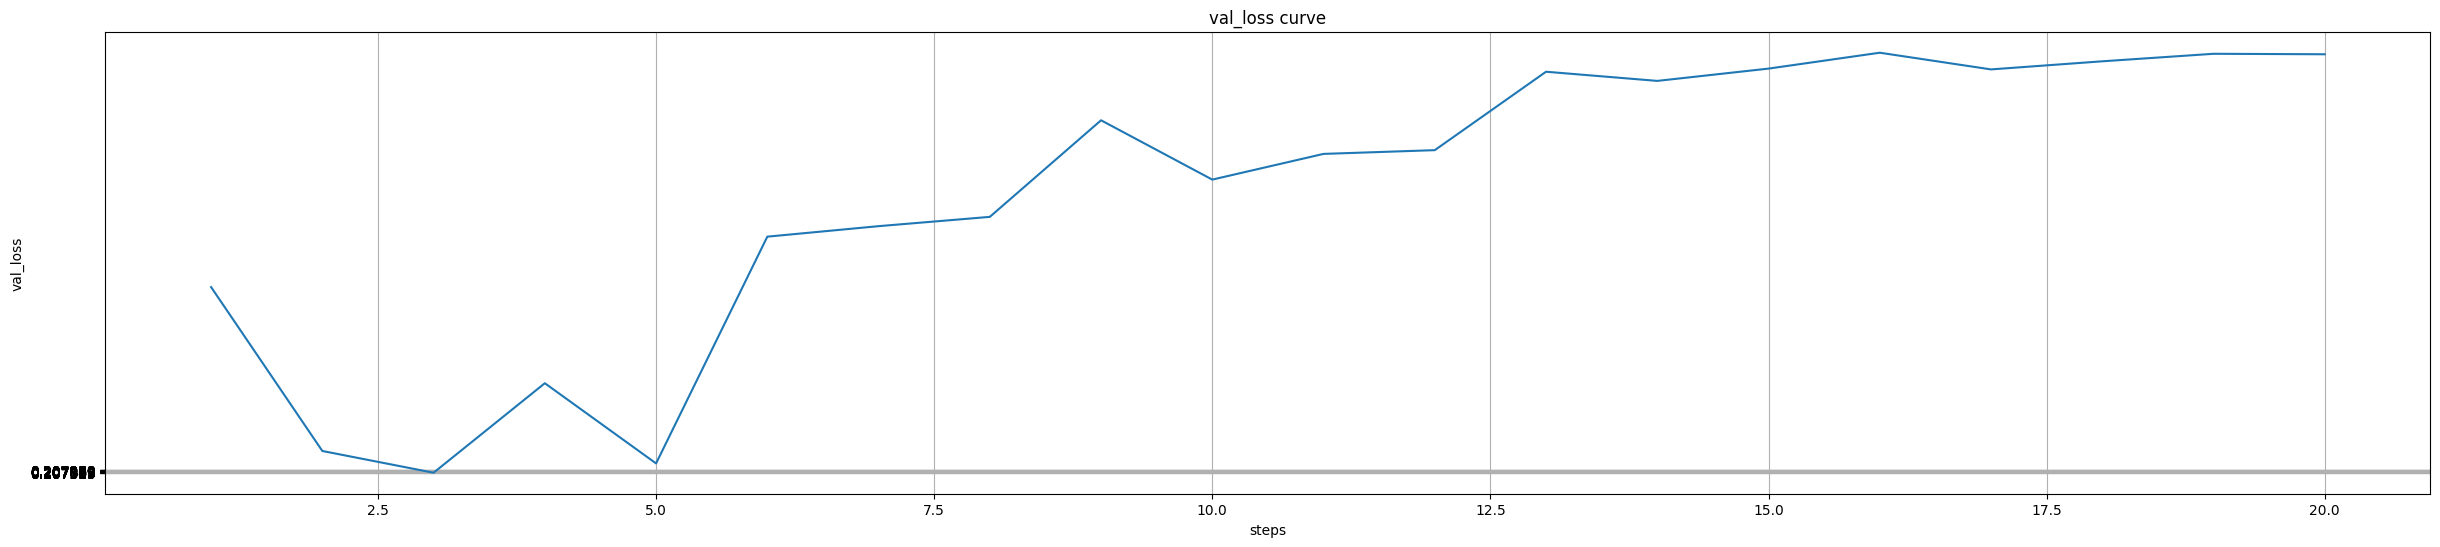

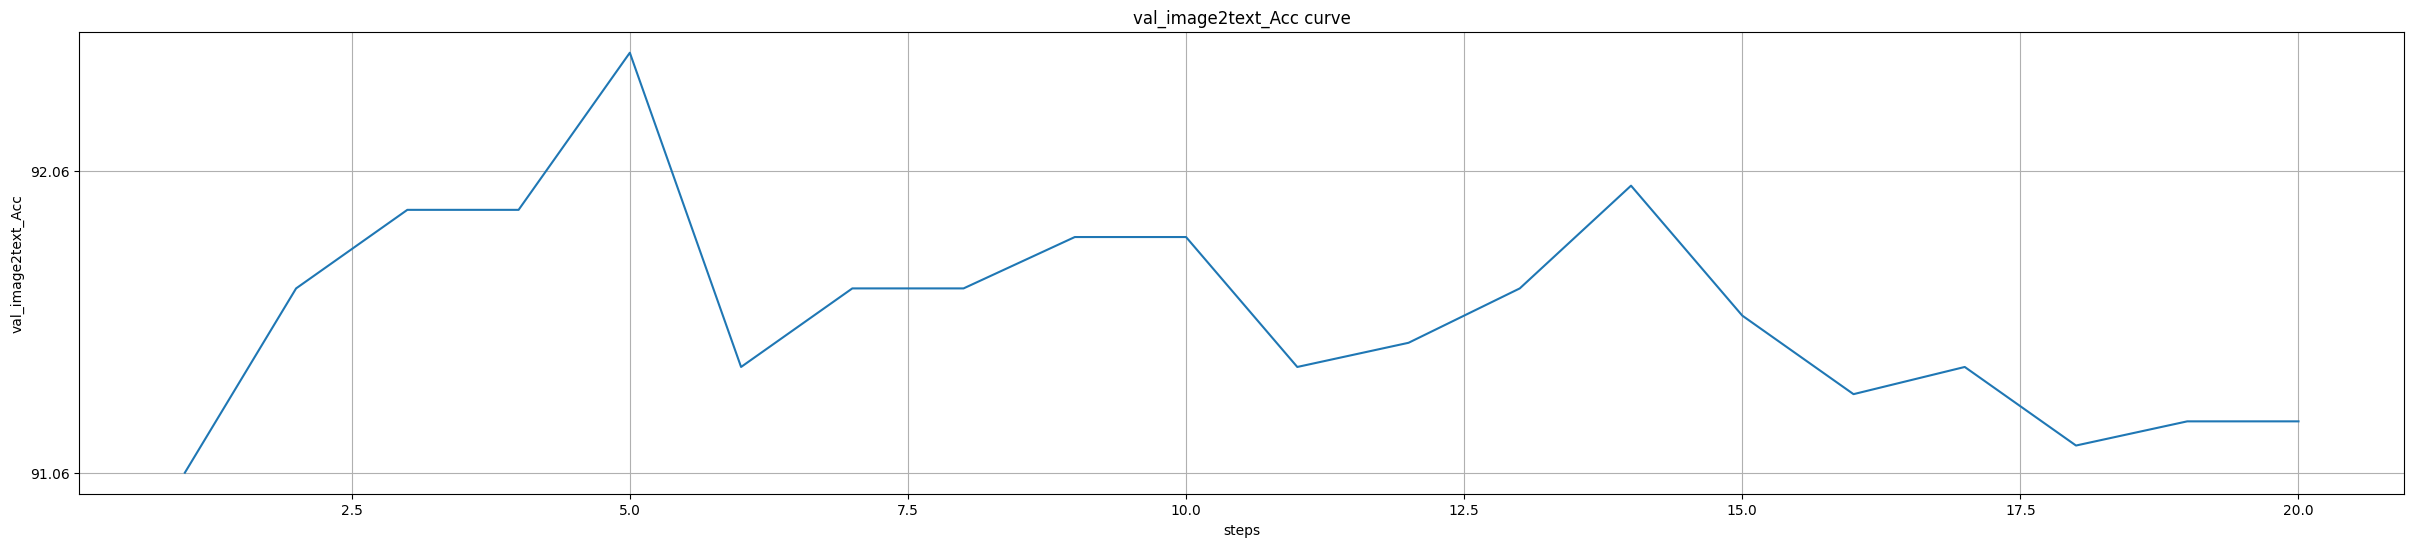

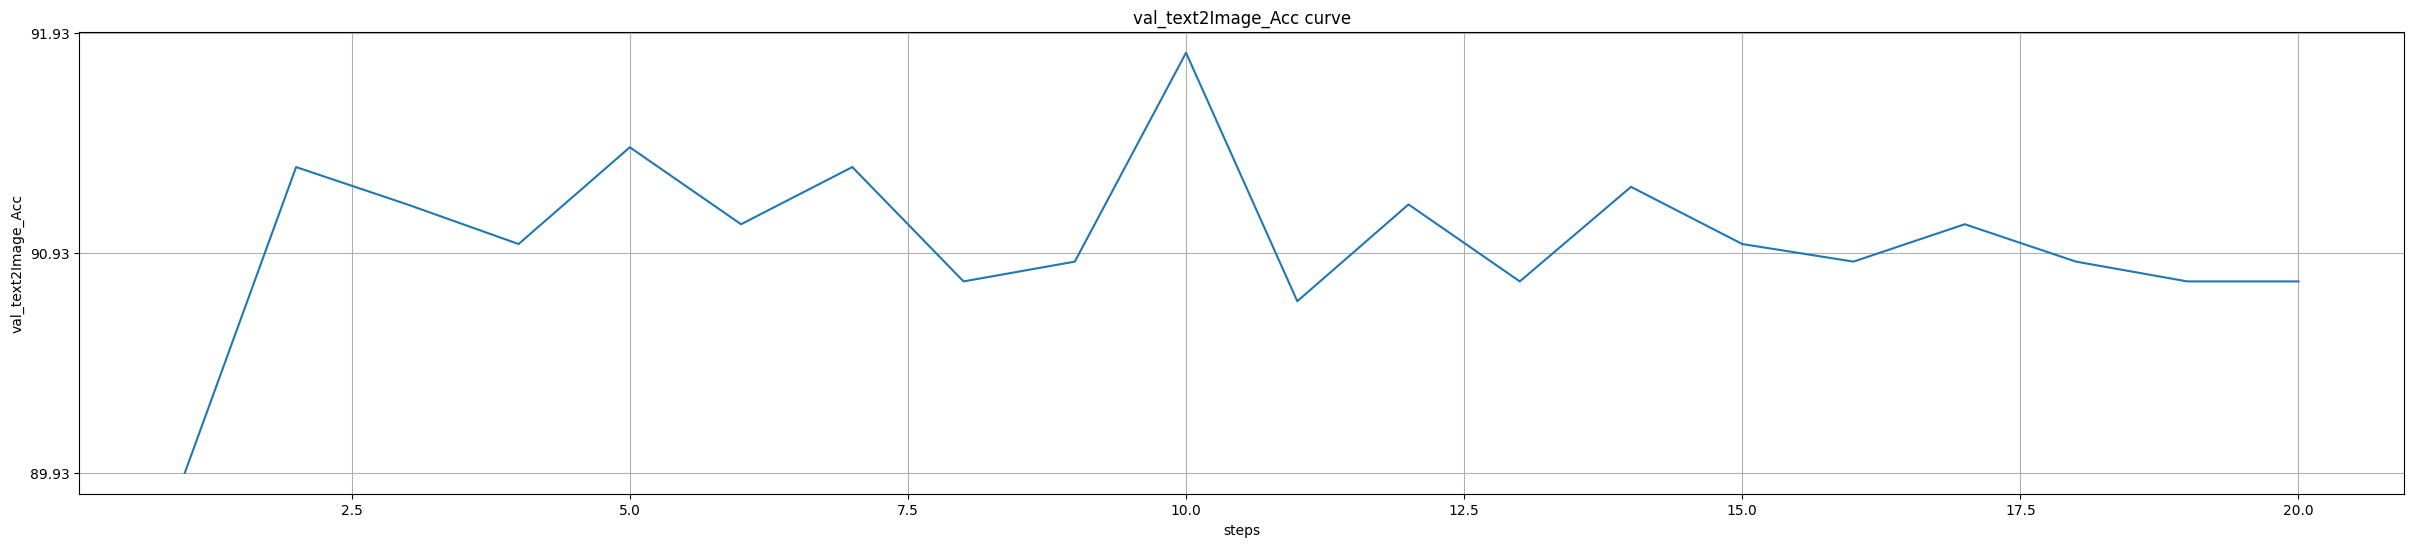

In [71]:
if __name__ == '__main__':
    # logfile, epochs = r"/tmp/0limiaomiao/project/data/experiments/muge_finetune_vit-b-16_roberta-base_bs128_8gpu/out_2024-01-10-09-58-03.log", 3
    
    # logfile, epochs = r"/tmp/0limiaomiao/project/data/experiments/flickr30k_finetune_vit-b-16_roberta-base_bs128_8gpu/out_2024-01-11-10-28-35.log", 3
    
    # logfile, epochs = r"/tmp/0limiaomiao/project/data/experiments/coco-cn_finetune_vit-b-16_roberta-base_bs1024_8gpu/out_2024-01-11-09-33-24.log", 20
    logfile, epochs = r"/tmp/0limiaomiao/project/data/experiments/coco-cn_finetune_vit-b-16_roberta-base_bs1024_8gpu/out_2024-01-29-10-23-49.log", 20
    
    global_steps, loss, image2text_Acc, text2Image_Acc, lr, val_loss, val_image2text_Acc, val_text2Image_Acc = getLoss(logfile, epochs)
    
    global_steps_graduate = []
    loss_graduate = []
    image2text_Acc_graduate = []
    text2Image_Acc_graduate = []
    lr_graduate = []

    val_loss_graduate = []
    val_image2text_Acc_graduate = []
    val_text2Image_Acc_graduate = []
    
    int_deGraduate = 0.5
    float_deGraduate = 0.1
    # epoch_1 计算y的刻度值
    print("len(global_steps): ", len(global_steps))
    epoch_name = f"Train Epoch: {len(global_steps)}"
    for i in range(len(global_steps[epoch_name])*int(1/int_deGraduate)):
        if i * int_deGraduate < max(global_steps[epoch_name]) + int_deGraduate:
            global_steps_graduate.append(i * int_deGraduate)

    for i in range(len(loss[epoch_name])*int(1/int_deGraduate)):
        if i * float_deGraduate + min(loss[epoch_name]) < max(loss[epoch_name]) + float_deGraduate:
            loss_graduate.append(i * float_deGraduate + min(loss[epoch_name]))

    for i in range(len(image2text_Acc[epoch_name])*int(1/int_deGraduate)):
        if i * float_deGraduate*10 + min(image2text_Acc[epoch_name])  < max(image2text_Acc[epoch_name]) + float_deGraduate:
            image2text_Acc_graduate.append(i * float_deGraduate*10 + min(image2text_Acc[epoch_name]))

    for i in range(len(text2Image_Acc[epoch_name])*int(1/int_deGraduate)):
        if i * float_deGraduate*10 + min(text2Image_Acc[epoch_name]) < max(text2Image_Acc[epoch_name]) + float_deGraduate:
            text2Image_Acc_graduate.append(i * float_deGraduate*10 + min(text2Image_Acc[epoch_name]))

    for i in range(len(lr[epoch_name])*int(1/int_deGraduate)):
        if i * float_deGraduate * 0.0001 + min(lr[epoch_name]) < max(lr[epoch_name]) + float_deGraduate * 0.0001:
            lr_graduate.append(i * float_deGraduate * 0.0001 + min(lr[epoch_name]))

    for i in range(len(val_loss)*int(1/int_deGraduate)):
        if i * float_deGraduate * 0.0001 + min(val_loss) < max(val_loss) + float_deGraduate * 0.0001:
            val_loss_graduate.append(i * float_deGraduate * 0.0001 + min(val_loss))

    for i in range(len(val_image2text_Acc)*int(1/int_deGraduate)):
        if i * float_deGraduate*10 + min(val_image2text_Acc)  < max(val_image2text_Acc) + float_deGraduate:
            val_image2text_Acc_graduate.append(i * float_deGraduate*10 + min(val_image2text_Acc))

    for i in range(len(val_text2Image_Acc)*int(1/int_deGraduate)):
        if i * float_deGraduate*10 + min(val_text2Image_Acc) < max(val_text2Image_Acc) + float_deGraduate:
            val_text2Image_Acc_graduate.append(i * float_deGraduate*10 + min(val_text2Image_Acc))

    
    drawLine(loss[epoch_name], "steps", "loss", "Loss curve", loss_graduate)
    drawLine(image2text_Acc[epoch_name], "steps", "image2Text_Acc", "Image2Text Acc curve", image2text_Acc_graduate)
    drawLine(text2Image_Acc[epoch_name], "steps", "text2Image_Acc", "Text2Image Acc curve", text2Image_Acc_graduate)
    drawLine(lr[epoch_name], "steps", "lr", "LR curve", lr_graduate)
    drawLine(val_loss, "steps", "val_loss", "val_loss curve", val_loss_graduate)
    drawLine(val_image2text_Acc, "steps", "val_image2text_Acc", "val_image2text_Acc curve", val_image2text_Acc_graduate)
    drawLine(val_text2Image_Acc, "steps", "val_text2Image_Acc", "val_text2Image_Acc curve", val_text2Image_Acc_graduate)
    